# Kickstarter project
## Our project for this semester is to try and predict whether a fundraising campaign in kickstarter will succeed or not.

This type of prediction can actualy be useful in several scenarios, whether for an entrepreneur trying to evaluate his chances, the kickstarter company itself that would like to promote promising campaigns or for an investor considering backing a company.

There are a few datasets available in kaggle such as: [here](https://www.kaggle.com/codename007/funding-successful-projects) and [here](https://www.kaggle.com/kemical/kickstarter-projects). These datasets are more limited timespan wise and in their richness of data. The dataset that we used in our project is offered [here](https://webrobots.io/kickstarter-datasets/). It is very large and somewhat messy, so our first steps are going to be devoted to get to know this dataset and clean it up so we can use it easily.

The data is scraped over different periods, the last scrape is from Nov 2019 and contains 57 very large csv files. Our first step would be to unify it all (scrapes from 2015 onwards, each containing about 100,000 records, with a lot of overlaping) into a single dataframe, and explore the columns.
Due to size limitations, we added an extra step here, and removed duplicates and live projects (which are about 10% of the data, but are usless). Otherwise, the built data frame might be to big to fit into memory.


In [ ]:
!pip install -r requirements.txt

In [2]:
import kickstarter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') # some seaborn plots ommit warnings. Known issue.
%matplotlib inline
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)

# Phase 1: Loading the data

This step will auto download the cleaned dataset as a pickle and extract it. It is also possible to build the dataset yourself with passing the argument cache=None, but this is a lengthy process that might take a few hours (downloading about 50 generations of the dataset, each about 1GB and uniting them). Once this pickle is on your computer, it will be auto loaded from it's location.

### note that this step requires internet connectivity and will download up to 1.5GB of data to your computer.

In [3]:
from kickstarter import data_loader as dl

In [4]:
df = dl.make_dataframe(path=r'rawData') #Files are assumed to be located in rawData sub.dir. caches pickle in cwd.
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,last_update_published_at,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,unread_messages_count,unseen_activity_count,urls,usd_pledged,usd_type
0,68,An anthology of stories about Girls and mythic...,"{""id"":324,""name"":""Anthologies"",""slug"":""publish...",2914.0,CA,Canada,1568572677,"{""id"":1114868812,""name"":""Alex McGilvery"",""slug...",CAD,$,True,USD,1573709709,False,NaN,0.754185,3000.0,473984565,NaN,False,NaN,NaN,1571114109,"{""id"":9633,""name"":""Kamloops"",""slug"":""kamloops-...",Mythical Girls,NaN,"{""key"":""assets/026/767/892/d39613dbce86eca0405...",3864.29,"{""id"":3813769,""project_id"":3813769,""state"":""in...",mythical-girls,https://www.kickstarter.com/discover/categorie...,True,False,successful,1573709710,0.757088,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",2925.608515,domestic
1,5,"""The clothing brand which that brings to life ...","{""id"":263,""name"":""Apparel"",""slug"":""fashion/app...",11.0,ES,Spain,1571086165,"{""id"":1577671901,""name"":""Fran Domínguez"",""slug...",EUR,€,False,USD,1573704291,False,NaN,1.100069,16900.0,1289060457,NaN,False,NaN,NaN,1571112291,"{""id"":768026,""name"":""Murcia"",""slug"":""murcia-mu...",POSTUGRAMER,NaN,"{""key"":""assets/026/837/652/432424ed459bf34a310...",10.00,"{""id"":3832688,""project_id"":3832688,""state"":""in...",postugramer,https://www.kickstarter.com/discover/categorie...,False,False,failed,1573704291,1.103099,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",11.030989,domestic
2,2,Soy for joy.,"{""id"":343,""name"":""Candles"",""slug"":""crafts/cand...",2.0,SG,Singapore,1569833730,"{""id"":592619042,""name"":""Talitha Kumia Darmo"",""...",SGD,$,True,USD,1573704000,False,NaN,0.733500,1300.0,904608803,NaN,False,NaN,NaN,1571647849,"{""id"":1062617,""name"":""Singapore"",""slug"":""singa...",Kandel: Sustainable scented candles,NaN,"{""key"":""assets/026/842/831/068baf8f2a3a543172d...",4.00,"{""id"":3823347,""project_id"":3823347,""state"":""in...",kandel-sustainable-scented-candles,https://www.kickstarter.com/discover/categorie...,False,False,failed,1573704001,0.733089,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",2.932358,domestic
3,92,Leading the way home,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",13117.0,US,the United States,1571103508,"{""id"":1282479904,""name"":""Stormy May"",""slug"":""s...",USD,$,True,USD,1573703599,False,NaN,1.000000,10000.0,917486356,NaN,False,NaN,NaN,1571107999,"{""id"":2485109,""name"":""Rough and Ready"",""slug"":...",Peace & Horses,NaN,"{""key"":""assets/026/839/208/45c4165f8e67d392334...",13117.00,"{""id"":3832831,""project_id"":3832831,""state"":""in...",peace-and-horses,https://www.kickstarter.com/discover/categorie...,True,False,successful,1573703599,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",13117.000000,international
4,1,Spotlight Theatre Workshop is running a free a...,"{""id"":284,""name"":""Musical"",""slug"":""theater/mus...",1.0,US,the United States,1571008952,"{""id"":421896452,""name"":""Nikki Bettcher Erickso...",USD,$,True,USD,1573702200,False,NaN,1.000000,3325.0,291455067,NaN,False,NaN,NaN,1571618755,"{""id"":2521015,""name"":""Willmar"",""slug"":""willmar...",Affordable and Meaningful Theatre for Youth,NaN,"{""key"":""assets/026/825/449/3b6957bf4d6906b44aa...",1.00,"{""id"":3832076,""project_id"":3832076,""state"":""in...",affordable-and-meaningful-theatre-for-youth,https://www.kickstarter.com/discover/categorie...,False,False,failed,1573702200,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,domestic


Great! Let's get a few details about this data: What are the features, how many records exist:

In [5]:
cols = list(df.columns.values)
print(pd.Series(cols))
num_recs = len(df.index)
print('There are originaly {} records in data'.format(num_recs))

0                backers_count
1                        blurb
2                     category
3     converted_pledged_amount
4                      country
5     country_displayable_name
6                   created_at
7                      creator
8                     currency
9              currency_symbol
10      currency_trailing_code
11            current_currency
12                    deadline
13       disable_communication
14                     friends
15                     fx_rate
16                        goal
17                          id
18                  is_backing
19                is_starrable
20                  is_starred
21    last_update_published_at
22                 launched_at
23                    location
24                        name
25                 permissions
26                       photo
27                     pledged
28                     profile
29                        slug
30                  source_url
31                   spotlight
32      

Taking a first peek at the data via Excel hints that there are many empty columns:
![peek](img/firstPeek.png)

Let's see what columns contain mostly null values:


# Phase 2: Cleaning the data

## Removing Na

In [6]:
nes = df.isna().sum()
nes.sort_values(ascending=False, inplace=False)

unseen_activity_count       314420
unread_messages_count       314420
last_update_published_at    314420
permissions                 314416
is_starred                  314415
friends                     314415
is_backing                  314415
country_displayable_name    296316
usd_type                    205036
fx_rate                     205031
converted_pledged_amount    204596
current_currency            204596
is_starrable                160200
source_url                   28272
staff_pick                   23561
location                      1105
blurb                           18
name                             3
category                         0
country                          0
deadline                         0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
urls                             0
spotlight                        0
disable_communicatio

We're not missing anything too important so far (though some sound important they are either not used or interchangable with other fields that are kept). Off with their head!

In [7]:
empty = {'friends','is_backing','is_starred','is_starrable','permissions', 'source_url'
         ,'country_displayable_name','converted_pledged_amount','current_currency',
         'usd_type','fx_rate', 'has_more','last_update_published_at','projects','search_url',
         'seed','staff_pick','total_hits','unread_messages_count','unseen_activity_count'}
letgo = [name for name in empty if name in cols] # For rerun
df.drop(columns=letgo,inplace=True)
nes = df.isna().sum()
nes.sort_values(ascending=False, inplace=False)

location                  1105
blurb                       18
name                         3
usd_pledged                  0
goal                         0
category                     0
country                      0
created_at                   0
creator                      0
currency                     0
currency_symbol              0
currency_trailing_code       0
deadline                     0
disable_communication        0
id                           0
urls                         0
launched_at                  0
photo                        0
pledged                      0
profile                      0
slug                         0
spotlight                    0
state                        0
state_changed_at             0
static_usd_rate              0
backers_count                0
dtype: int64

## Removing redundant columns
We can already see redundant attributes which we are sure we will not need:
- Data that is used for display purpases: such as 'currency_symbol', 'currency_trailing_code'.
- Data that is biased: such as backers count (This is part of the prediction), or disable_communication which is an option for failed projects 
- Data that will not be used by our model: location, 'profile', 'urls','usd_type', 'location'.
Let's start with dropping these.

Looks like we can drop 'friends','is_backing','is_starred','permissions' as they are basicaly empty.

In [8]:
redundant = {'backers_count','currency_symbol', 'currency_trailing_code','disable_communication',
             'profile','urls','spotlight','usd_pledged'}
letgo = [name for name in redundant if name in cols]
df.drop(columns=letgo, inplace=True)
cols = list(df.columns.values)
print(pd.Series(cols))

0                blurb
1             category
2              country
3           created_at
4              creator
5             currency
6             deadline
7                 goal
8                   id
9          launched_at
10            location
11                name
12               photo
13             pledged
14                slug
15               state
16    state_changed_at
17     static_usd_rate
dtype: object


# Phase 3: Feature Extraction

In [9]:
from kickstarter import feature_extraction as fe

## Converting dates
From looking at the data we can also see that the time fields are given in UNIX time. It'll be usefull ahead if we can break each date into a day month year trio. We'll run the conversion and replace each column with the corresponding 3 fields.

In [10]:
timefields = ['created_at','deadline','launched_at','state_changed_at']
fe.convert_time(df,timefields)
df[timefields].head()

,created_at,deadline,launched_at,state_changed_at
0,2019-09-15 18:37:57,2019-11-14 05:35:09,2019-10-15 04:35:09,2019-11-14 05:35:10
1,2019-10-14 20:49:25,2019-11-14 04:04:51,2019-10-15 04:04:51,2019-11-14 04:04:51
2,2019-09-30 08:55:30,2019-11-14 04:00:00,2019-10-21 08:50:49,2019-11-14 04:00:01
3,2019-10-15 01:38:28,2019-11-14 03:53:19,2019-10-15 02:53:19,2019-11-14 03:53:19
4,2019-10-13 23:22:32,2019-11-14 03:30:00,2019-10-21 00:45:55,2019-11-14 03:30:00


Another inconviniency in this dataset is that some of the fields are given in json form, specificaly the 'catagory' and 'creator' attributs. We'll parse just the interesting parts out of these fields and remove all bloat text.

In [11]:
fe.extract_catagories(df) #gets project catagory data

One last thing that remains is to convert the goal amount which is the project's local currency (and not usd).
Once this is done we no longer need the static usd column (it is dropped by the function). We will also parse the project photo url for future use.

In [12]:
fe.convert_goal(df)
fe.get_image_url(df)
df.head()

,blurb,category,country,created_at,creator,currency,deadline,goal,id,launched_at,location,name,photo,pledged,slug,state,state_changed_at,parent_category,category_name,parent_category_name
0,An anthology of stories about Girls and mythic...,324,CA,2019-09-15 18:37:57,"{""id"":1114868812,""name"":""Alex McGilvery"",""slug...",CAD,2019-11-14 05:35:09,2271,473984565,2019-10-15 04:35:09,"{""id"":9633,""name"":""Kamloops"",""slug"":""kamloops-...",Mythical Girls,https://ksr-ugc.imgix.net/assets/026/767/892/d...,3864.29,mythical-girls,successful,2019-11-14 05:35:10,18,anthologies,publishing
1,"""The clothing brand which that brings to life ...",263,ES,2019-10-14 20:49:25,"{""id"":1577671901,""name"":""Fran Domínguez"",""slug...",EUR,2019-11-14 04:04:51,18642,1289060457,2019-10-15 04:04:51,"{""id"":768026,""name"":""Murcia"",""slug"":""murcia-mu...",POSTUGRAMER,https://ksr-ugc.imgix.net/assets/026/837/652/4...,10.00,postugramer,failed,2019-11-14 04:04:51,9,apparel,fashion
2,Soy for joy.,343,SG,2019-09-30 08:55:30,"{""id"":592619042,""name"":""Talitha Kumia Darmo"",""...",SGD,2019-11-14 04:00:00,953,904608803,2019-10-21 08:50:49,"{""id"":1062617,""name"":""Singapore"",""slug"":""singa...",Kandel: Sustainable scented candles,https://ksr-ugc.imgix.net/assets/026/842/831/0...,4.00,kandel-sustainable-scented-candles,failed,2019-11-14 04:00:01,26,candles,crafts
3,Leading the way home,30,US,2019-10-15 01:38:28,"{""id"":1282479904,""name"":""Stormy May"",""slug"":""s...",USD,2019-11-14 03:53:19,10000,917486356,2019-10-15 02:53:19,"{""id"":2485109,""name"":""Rough and Ready"",""slug"":...",Peace & Horses,https://ksr-ugc.imgix.net/assets/026/839/208/4...,13117.00,peace-and-horses,successful,2019-11-14 03:53:19,11,documentary,film & video
4,Spotlight Theatre Workshop is running a free a...,284,US,2019-10-13 23:22:32,"{""id"":421896452,""name"":""Nikki Bettcher Erickso...",USD,2019-11-14 03:30:00,3325,291455067,2019-10-21 00:45:55,"{""id"":2521015,""name"":""Willmar"",""slug"":""willmar...",Affordable and Meaningful Theatre for Youth,https://ksr-ugc.imgix.net/assets/026/825/449/3...,1.00,affordable-and-meaningful-theatre-for-youth,failed,2019-11-14 03:30:00,17,musical,theater


Cool. Looks like our data is relativly balanced, and projects in our data set are almost eaqualy likely to fail or succeed. Now let's take a look at the creator column. This is a jason field that is (as usual with this dataset) filled with illegal json strings, we'll fix it and extract the creator id.

In [13]:
fe.extract_creator_id(df) #replaces the creator json with creator id int, un
df[["creator_id", "creator"]].head()

,creator_id,creator
0,1114868812,"{""id"":1114868812,""name"":""Alex McGilvery"",""slug..."
1,1577671901,"{""id"":1577671901,""name"":""Fran Domínguez"",""slug..."
2,592619042,"{""id"":592619042,""name"":""Talitha Kumia Darmo"",""..."
3,1282479904,"{""id"":1282479904,""name"":""Stormy May"",""slug"":""s..."
4,421896452,"{""id"":421896452,""name"":""Nikki Bettcher Erickso..."


Values that we did not fix, got a creator id of -1. Let's see if there are many of these, and if not we'll just drop them.

In [14]:
baddies = df.loc[df['creator_id'] == -1]
print('Number of bad projects dropped due to irregular creator field: {}'.format(len(baddies)))
df.drop(baddies.index, inplace=True)

Number of bad projects dropped due to irregular creator field: 1


Let's use this field for some more good and extract the user's profile picture and whether she \ he is a registered kickstarter user.

In [15]:
fe.extract_creator_fields(df)
print(df['creator_status'].value_counts())
print(df['super_creator'].value_counts())

True       147089
unknown    112490
Name: creator_status, dtype: int64
unkown    293153
Name: super_creator, dtype: int64


Sadly, the information about the users is missing. We'll drop these two new columns.

In [16]:
cols = list(df.columns.values)
bad = {'creator_status','super_creator'}
letgo = [name for name in bad if name in cols]
df.drop(columns=letgo,inplace=True)

In [17]:
from kickstarter import visio

Now, let's take a look at how our data distributes globaly.
projects by origin country:

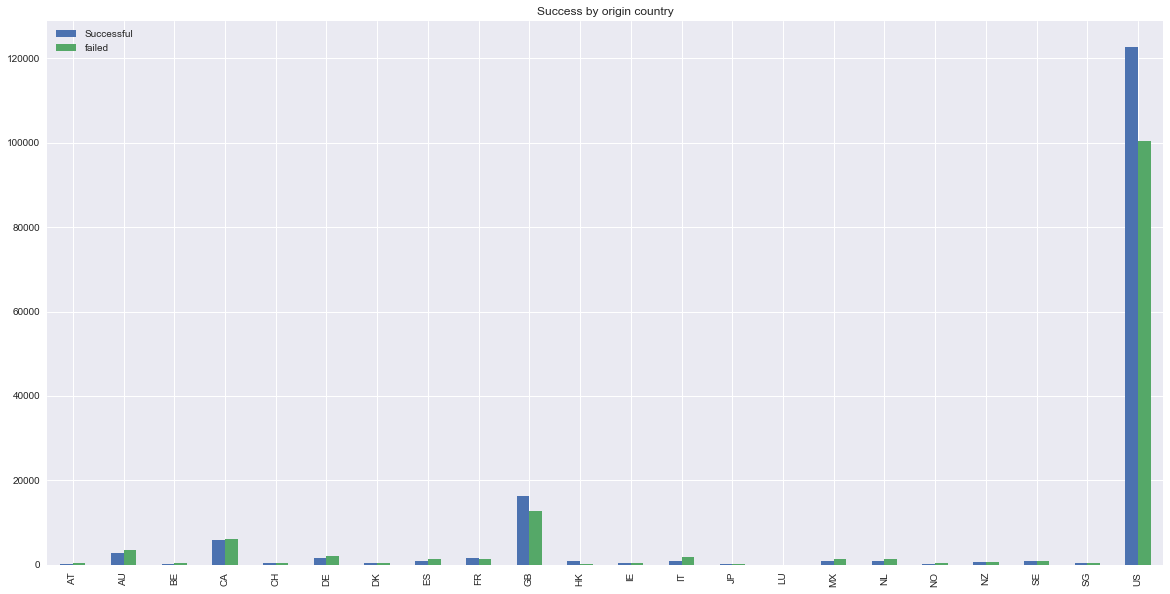

In [18]:
visio.plot_success_by_country(df)

Exploring our dataset, we could see that this column is actualy corrupted, where projects from different locations are labled as American or British projects. We'll use another field, 'location' to fix this data. The location information is contained in jason form, and we will parse relevant fields. Where location is NAN, we'll stay with the original contry column. Let's fix this and see how many projects actually come from each country:

In [19]:
fe.extract_country(df)
counts = df['country'].value_counts()
print(counts)

US    228005
GB     29847
CA     12954
AU      6597
DE      4235
FR      3432
IT      3200
MX      2734
ES      2674
NL      2355
SE      1782
NZ      1315
HK      1220
DK      1135
JP       930
SG       854
CH       828
IE       798
NO       644
BE       640
AT       589
CN       515
IN       291
PL       278
UA       251
KR       226
IL       222
TW       221
TH       213
PR       201
BR       179
ZA       175
CO       164
RU       163
GR       161
ID       160
CZ       140
PE       132
TR       122
SI       117
AR       116
KE       111
HU       107
FI       104
PH       104
IS       103
RO        96
NP        90
GH        81
PT        80
VN        79
LT        78
CL        77
BG        75
CR        74
EC        74
GT        73
UG        70
RS        68
HT        67
LU        63
CU        58
KH        55
EG        51
EE        48
MY        47
HR        46
NI        46
AE        44
AF        41
BA        41
MA        40
LV        40
DO        38
TZ        38
BO        36
NG        35

While being more acurate, we also added a lot of noise to our dataset. We will define a threshold, any country with less projects than the threshold will be changed to be considered 'Global'. This will help us keeping are data from being too sparse, and will also save us from satistical errors or biases.

In [20]:
# Minimun number of samples to appear in dataset
thresh = 450
fe.unify_countries(df, counts, thresh)
counts = df['country'].value_counts()
print(counts)

US        228005
GB         29847
CA         12954
Global      7135
AU          6597
DE          4235
FR          3432
IT          3200
MX          2734
ES          2674
NL          2355
SE          1782
NZ          1315
HK          1220
DK          1135
JP           930
SG           854
CH           828
IE           798
NO           644
BE           640
AT           589
CN           515
Name: country, dtype: int64


Let's see how this more accurate and compact global partition breaks down to success vs. failure rates.

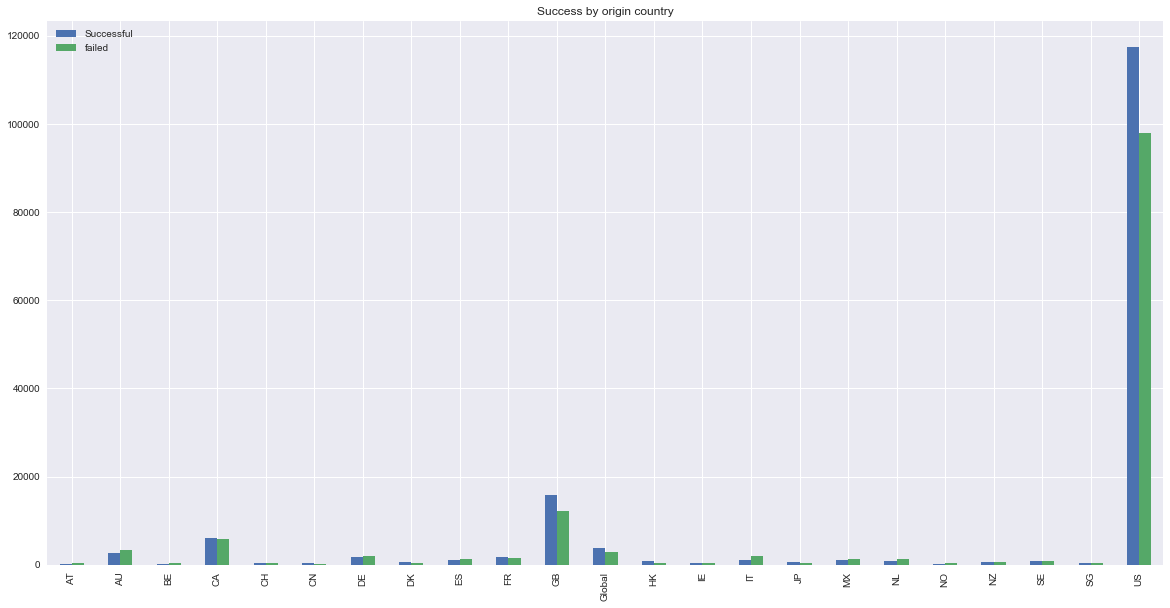

In [21]:
visio.plot_success_by_country(df)

It's hard to estimate the rest of the world as it's shadowed by the US. Let's check out all countries but the US:

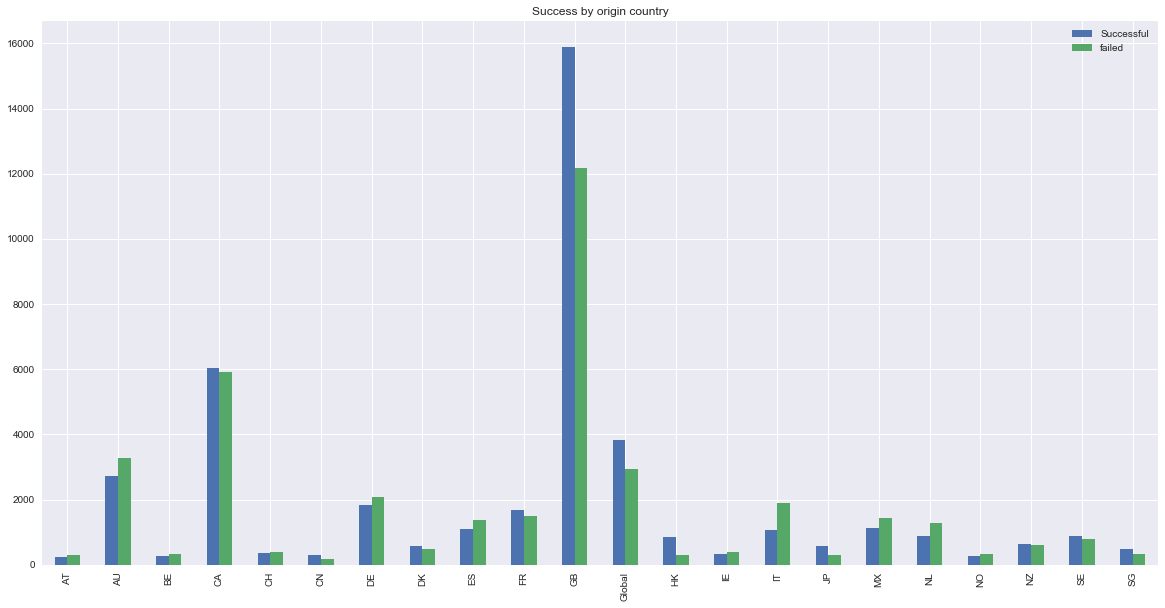

In [22]:
visio.plot_success_by_country(df.loc[df['country'] != 'US'])

As US is the major origin country, Let's use data available to us in JSON form to extract the origin state within the US. This data is noisy: some projects in the US contain nan as state field, or some straight-out garbage arabic words and such. This is a small minority of US projects, so we will just mark all of these as 'US unknown'.

In [23]:
fe.get_us_state(df)
counts = df['country'].value_counts()
print(counts)

US CA         43287
GB            29847
US NY         26545
US TX         13349
CA            12954
US FL         11357
US IL          8839
US WA          7833
US PA          7288
Global         7135
AU             6597
US MA          6376
US GA          6239
US OH          5886
US OR          5873
US MI          5348
US CO          5281
US NC          5147
US TN          4671
US AZ          4482
US VA          4348
DE             4235
US MN          4068
US UT          3975
US NJ          3812
US MO          3444
FR             3432
IT             3200
US MD          3165
US WI          2843
US IN          2837
US NV          2764
MX             2734
ES             2674
NL             2355
US DC          2338
US LA          1993
US CT          1982
US SC          1842
SE             1782
US KY          1671
US OK          1483
US AL          1450
NZ             1315
US NM          1282
HK             1220
US ID          1216
DK             1135
US IA          1121
US ME          1111


The final breakdown by country:

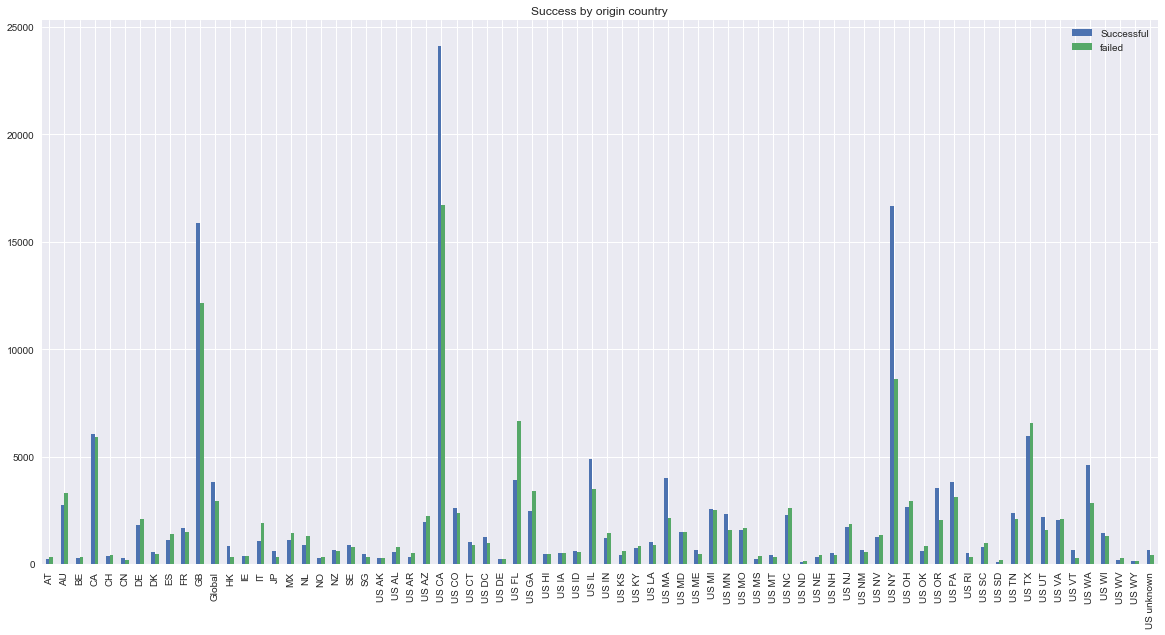

In [24]:
visio.plot_success_by_country(df)

We can see that while most states and countries destribute close to the original distribution, some locations break out: projects from California, New-York or Great Britan (GB) have a larger chance to succeed, while projects from Florida or Texas and several other southern states tend to fail. We extracted all we could from the location column, and can now drop it and move forward.

In [25]:
df.drop(columns=['location'],inplace=True)

Let's see how catagory effects success rates:

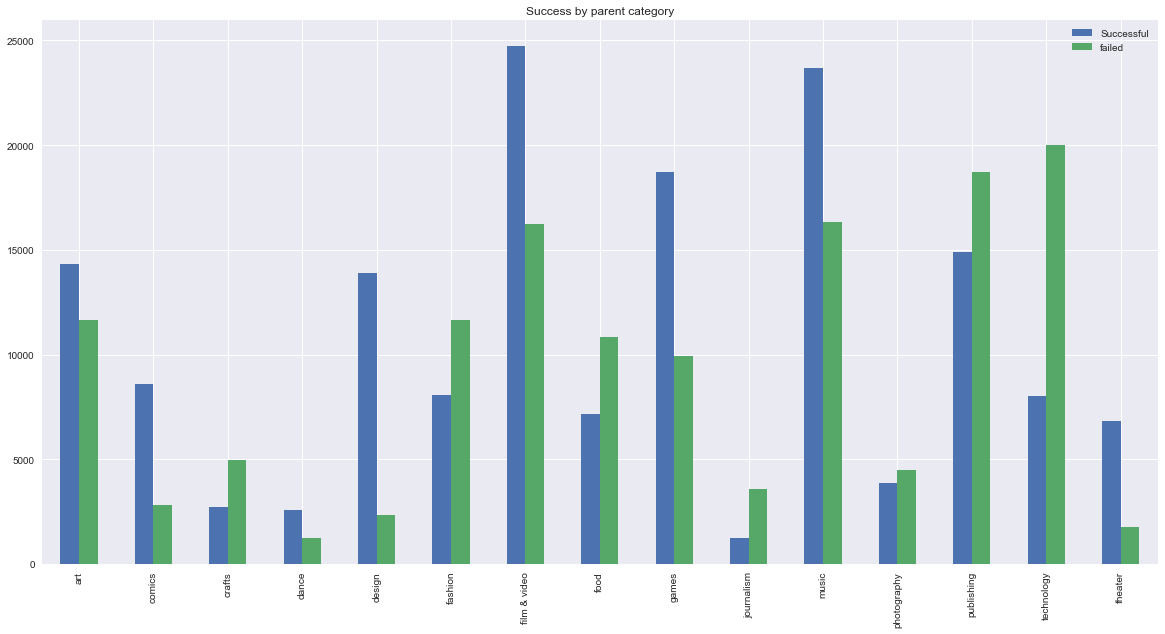

In [26]:
visio.plot_success_by_category(df)

It seems as product catagory has an impact on campaign result. Our data set allows us to view this in even finer granularity, by sub catagories:

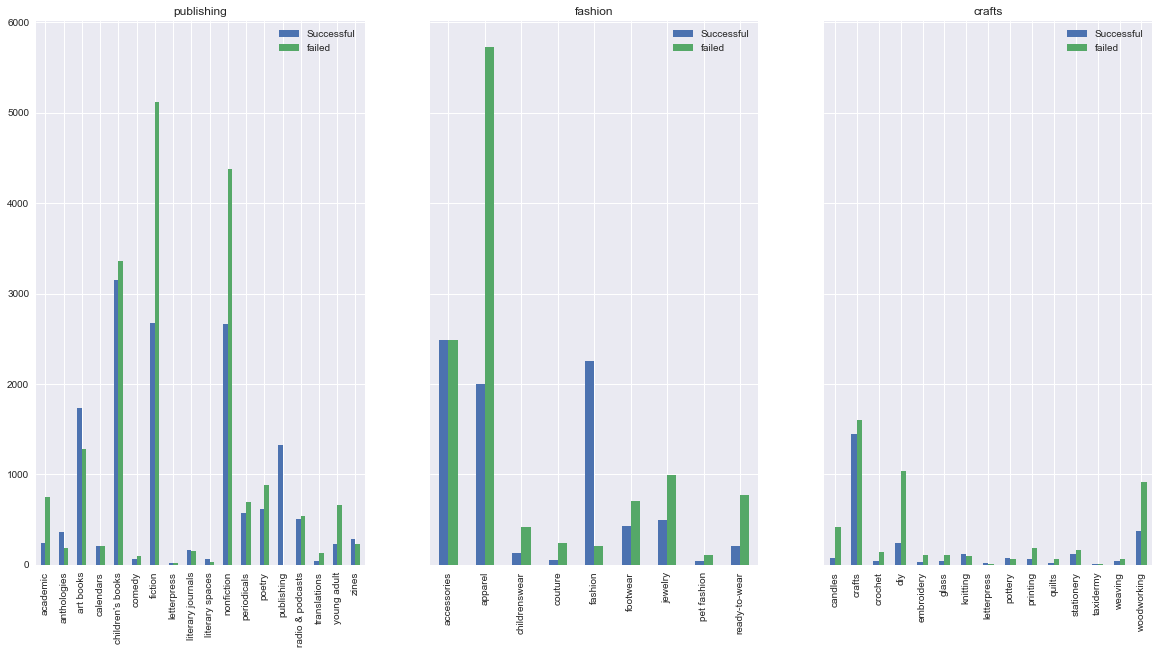

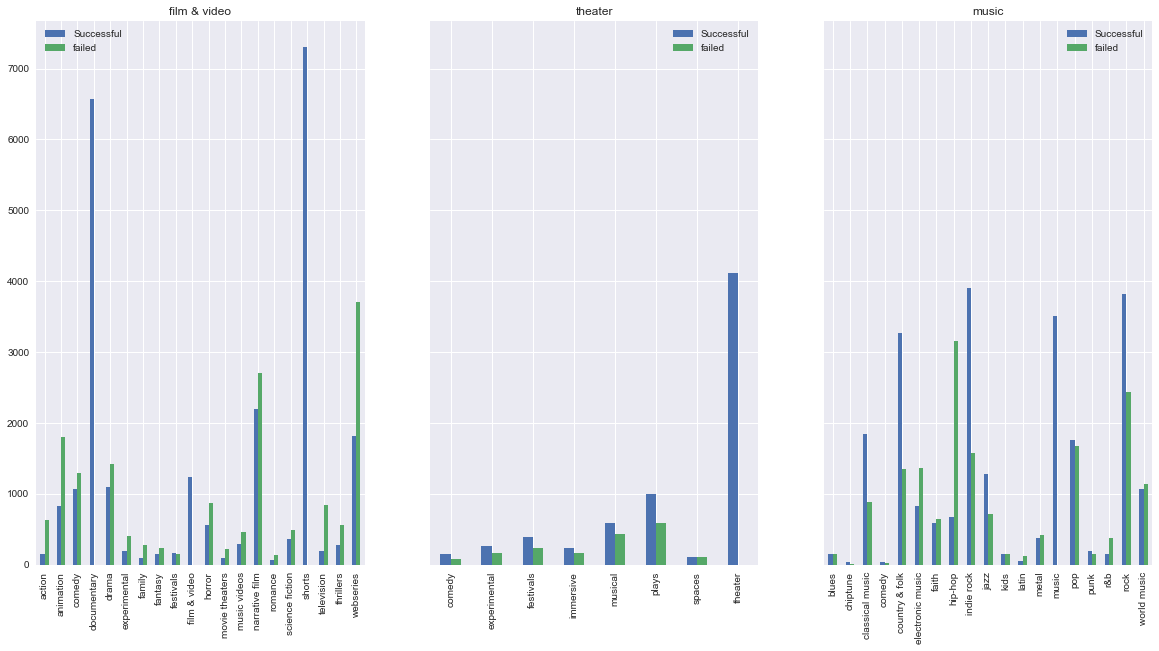

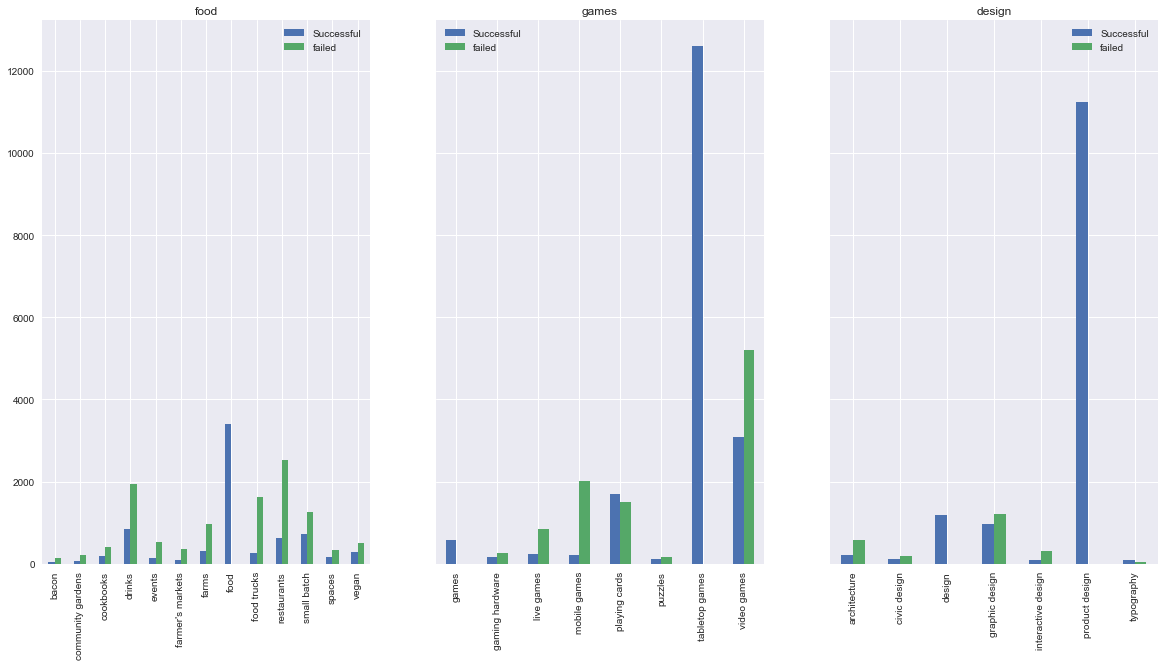

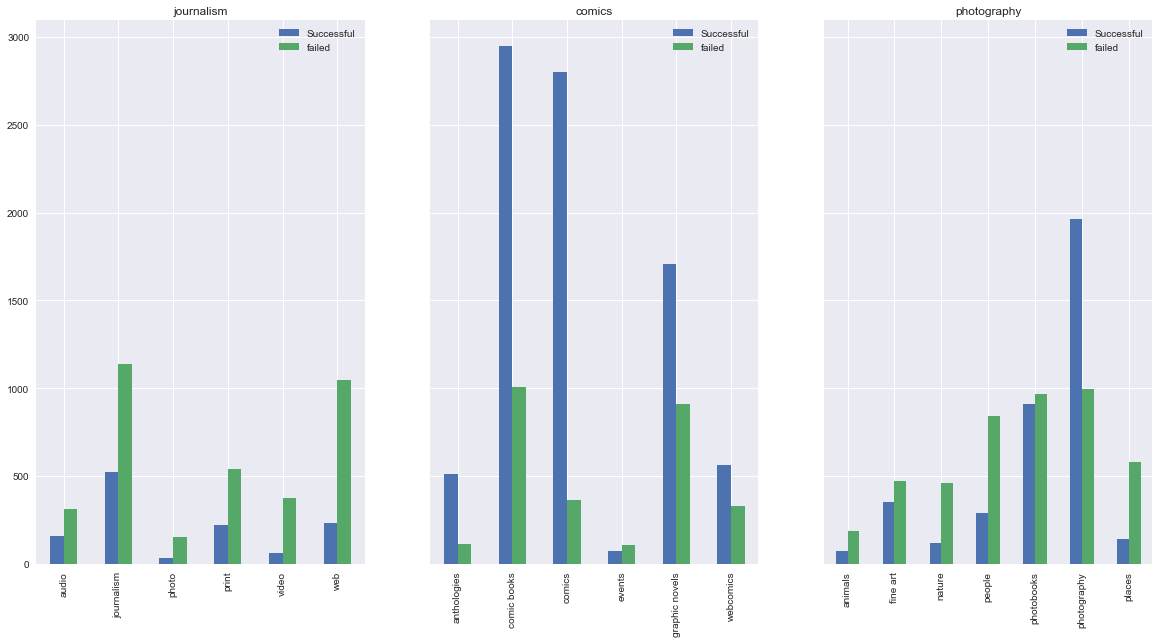

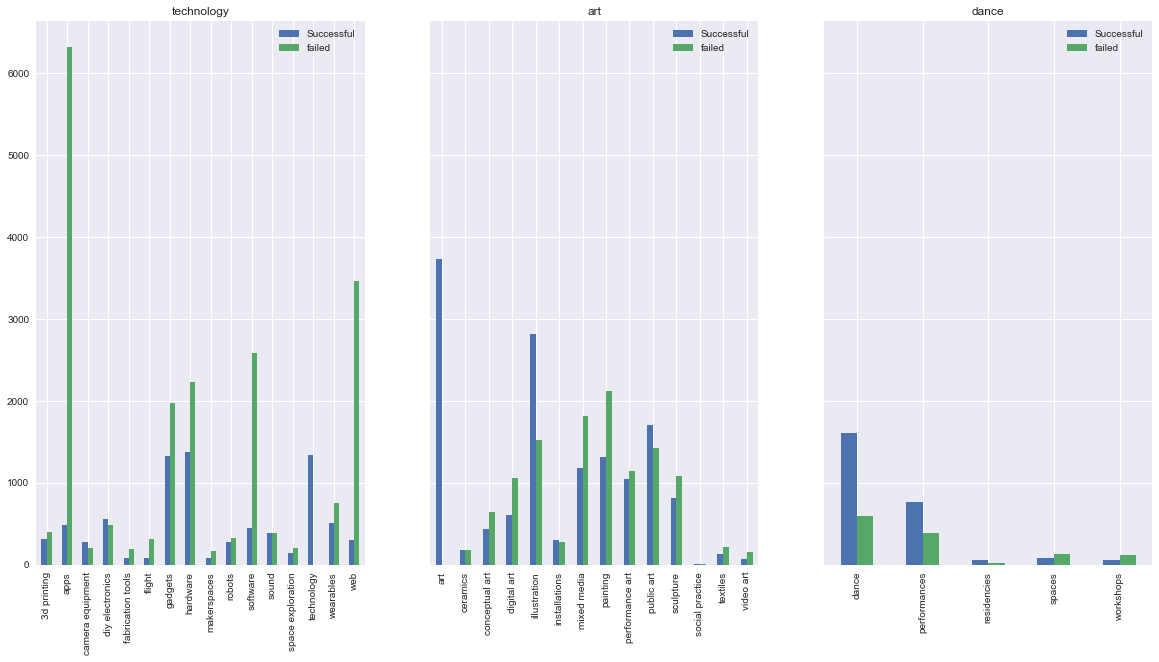

In [27]:
visio.plot_success_by_sub_category(df)

Another thing to factor in is seasonality, let's see if there is any change in the success depending on project start month. To be able to look at this data over several years, we'll add specific month and year columns for launched_at and deadline. We will also add a field calculating the delta in months between launch and deadline.

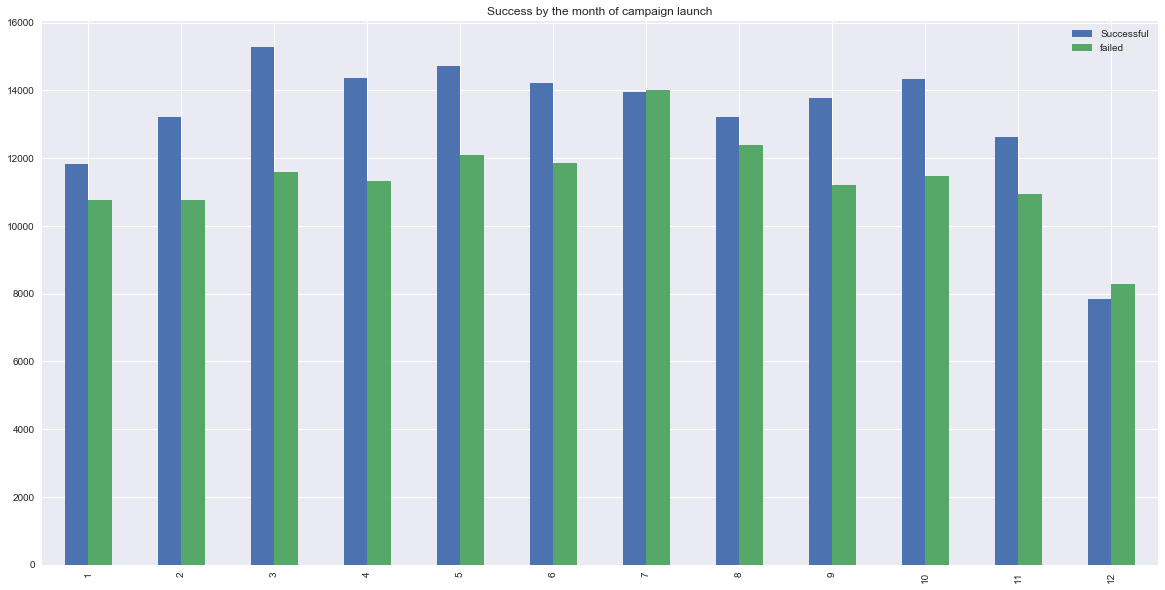

In [28]:
fe.extract_month_and_year(df, ['launched_at','deadline'])
fe.add_destination_delta_in_days(df)
visio.plot_success_by_launched_month(df)

Overall, looking at the whole period of given data:

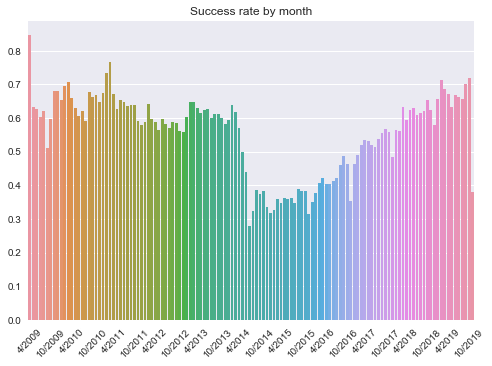

In [29]:
visio.plot_success_over_time(df)

Let's see how the duration of the campaign affects the probability of success.

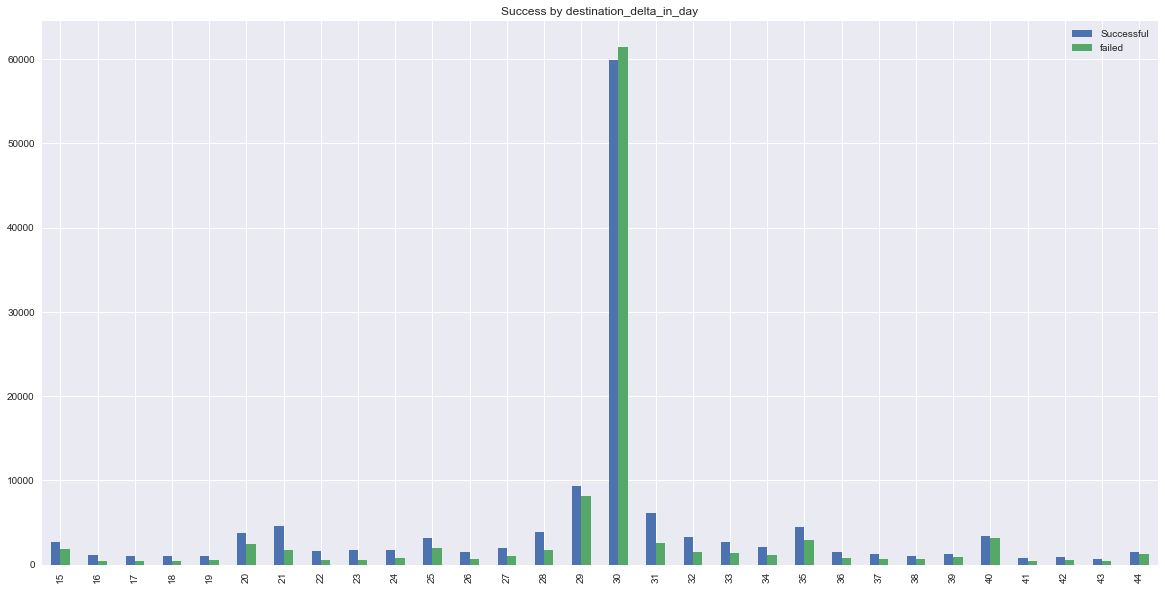

In [30]:
visio.plot_success_by_destination_delta_in_days(df)

number of records out of range: 35931


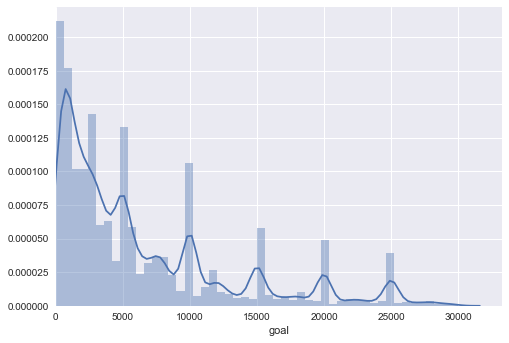

In [31]:
inner = df.loc[df['goal']<30000]
sns.distplot(inner['goal']).set(xlim=(0))
print('number of records out of range:',len(df.loc[df['goal']>30000]))

[(0, 222776.64635016784)]

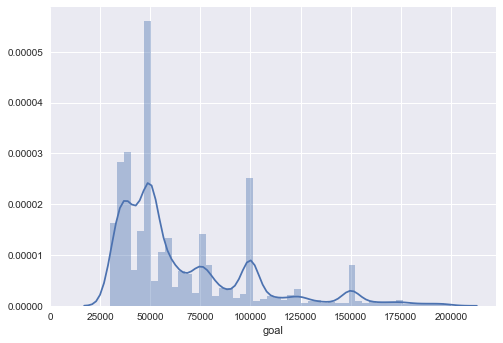

In [32]:
inner = df.loc[df['goal']>30000]
inner = inner.loc[df['goal']<200000]
sns.distplot(inner['goal']).set(xlim=(0))
#print('number of records out of range:',len(df.loc[df['goal']<50000]))

number of records out of range: 12460


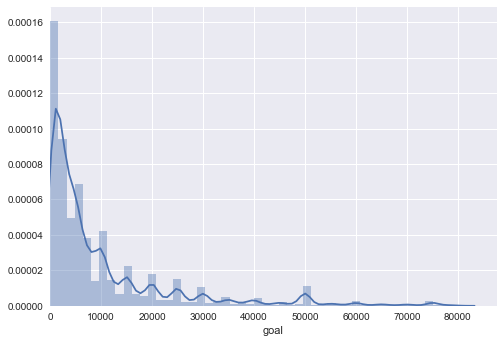

In [33]:
inner = df.loc[df['goal']<80000]
sns.distplot(inner['goal']).set(xlim=(0))
print('number of records out of range:',len(df.loc[df['goal']>80000]))

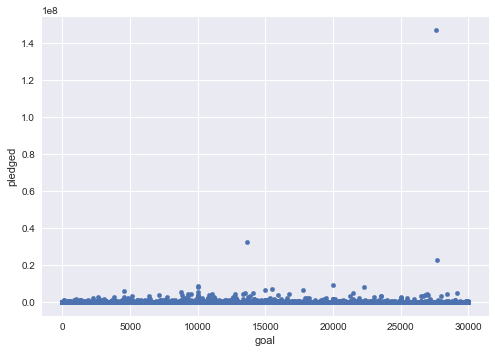

In [34]:
cent = df.loc[df['goal']<30000]
cent.plot.scatter(x='goal',y='pledged')

# Phase 4: Baseline Model

Now, Let's try running a few naive models and see what it is that we are dealing with here.  
This process can take some time to complete so we added the outcome for each model

In [35]:
import kickstarter.models.knn_model as knn
import kickstarter.models.logistic_regression_model as logistic
import kickstarter.models.random_forest_model as forest
import kickstarter.models.gradient_boosting_model as gradient_boosting

In [36]:
# logReg_pr = logistic.run_model(df)
# models = {'Logistic regression' : logReg_pr}

precision is: 0.6405603969213154

Let's try a few other models: KNN, Random forest and gradient boosting.

In [37]:
# knn_pr = knn.run_model(df)
# models['KNN'] = knn_pr

![peek](img/knn.png)
chosen nearest neighbours: 22  
precision is: 0.6703931047643279

In [38]:
# forest_pr = forest.run_model(df)
# models['Random forest'] = forest_pr

![peek](img/forest.png)
chosen number of trees: 900  
precision is: 0.6986991921633484

In [39]:
# boost_pr = gradient_boosting.run_model(df)
# models['Gradient boost'] = boost_pr

![peek](img/boosting.png)
chosen number of estimators: 950  
precision is: 0.728150244895363

In [40]:
# visio.plot_precision(models)

![peek](img/all_models.png)

# Phase 5: Some more feature extraction
next we want to gather statistics about each creator's previous projects  
### But first!
In order to prevent leakage lets split the dataframe into train and test

In [41]:
from kickstarter.data import Data
data = Data(df) # Some container for the train,test split

Somthing that might be interesting to learn, is how well this creator's past projects did. The function called bellow, extracts per creator the total number of past projects by him/her, the number of successful ones and the number of un-succesful ones (contains failed projects, cancled etc - this field will be delt with next).
#### Note: 
A transformer is a class which implements `fit` and `transform` and the `apply_transformer` function applies it over our data.  


In [42]:
from kickstarter.transformers import CreatorTransformer

data.apply_transformer(CreatorTransformer())

251534it [00:20, 12240.40it/s]
100%|██████████| 212011/212011 [00:00<00:00, 538491.57it/s]


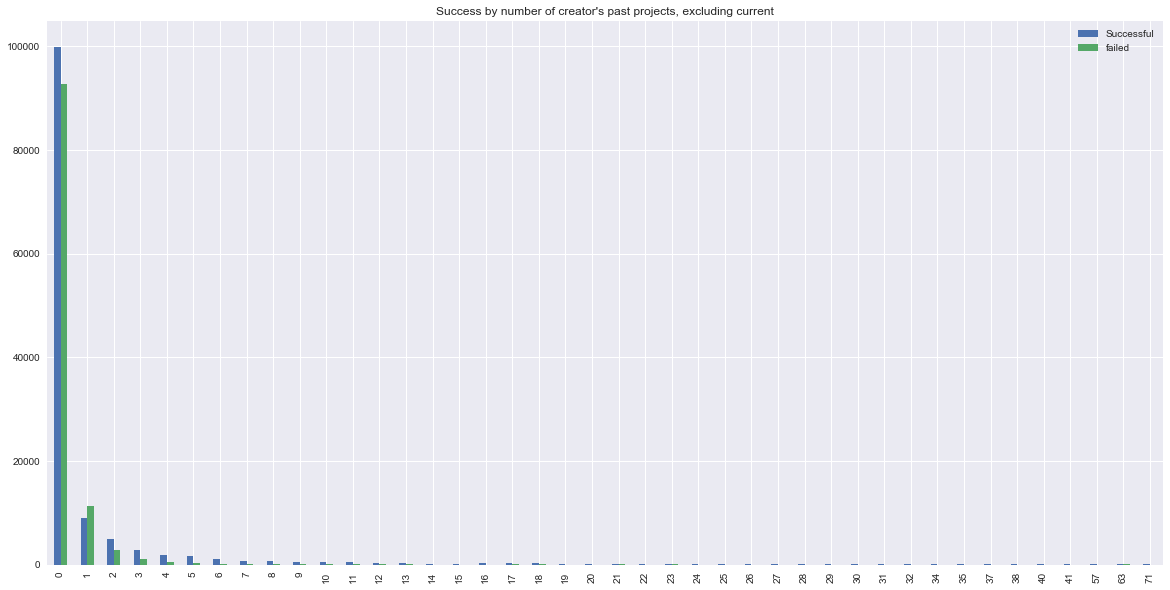

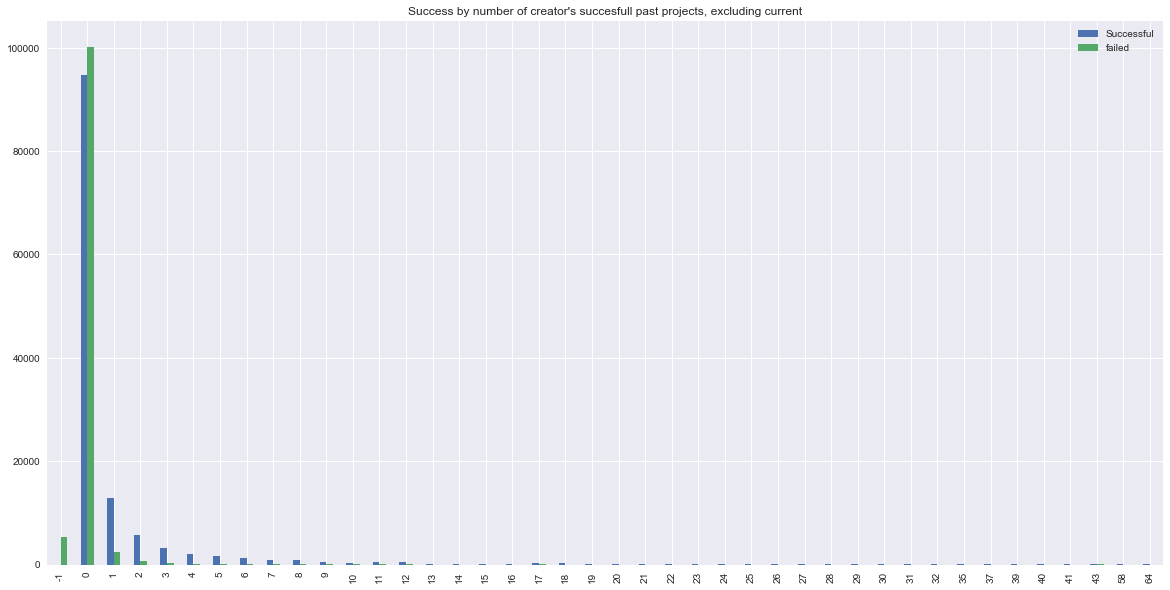

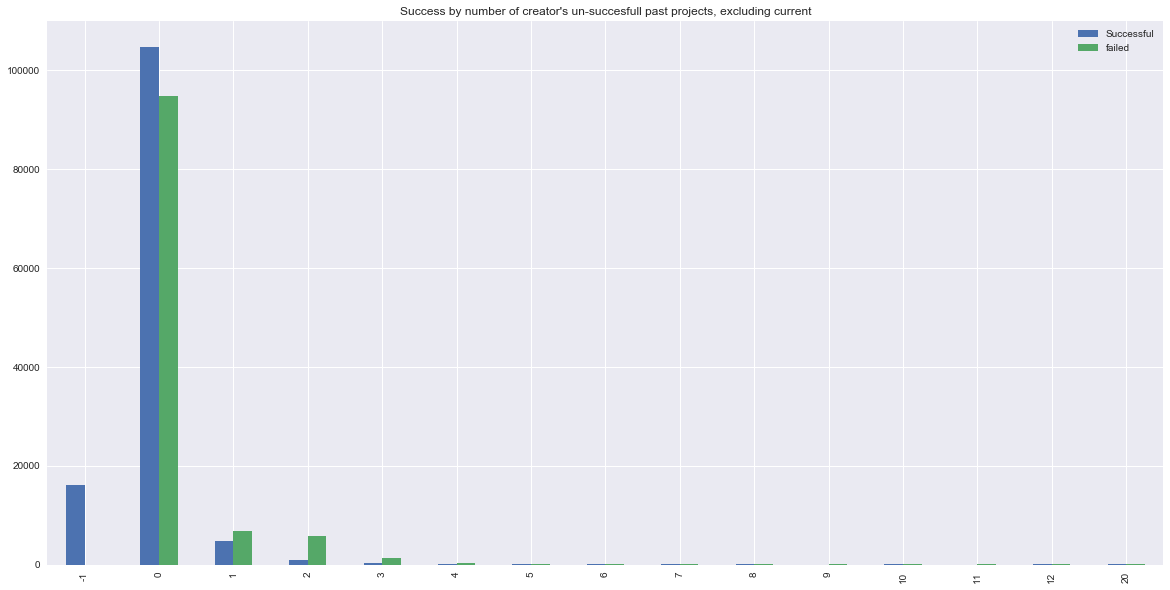

In [43]:
from kickstarter.visio import plot_sccess_by_creator_history
plot_sccess_by_creator_history(data.train_df)

We finished extracting all the data contained in the creator column. We can now drop it and move on. 

In [44]:
data.train_df.drop(columns=['creator'],inplace=True)
data.test_df.drop(columns=['creator'],inplace=True)

As this is basicaly what we are asking, let's see how many projects of each status are in our dataset.

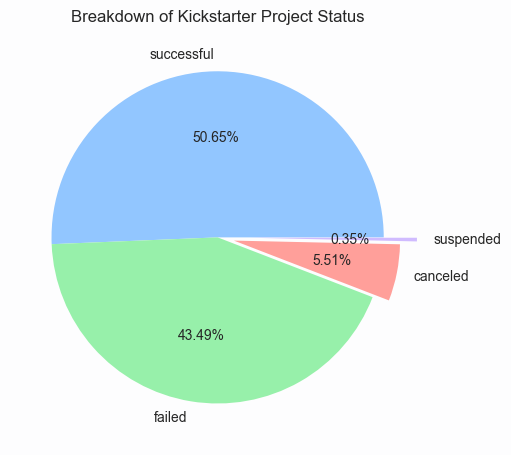

In [45]:
visio.plot_distriubtion_by_state_slice(data.train_df)

Since live projects can't be used, we'll clear them out and also unite suspended and canceled project to be labled as failed.
We waited until applying this step, as we wanted to count canceled or suspended projects as a part of our creators history. This reduction, gives us:

successful    127408
failed        109383
Name: state, dtype: int64


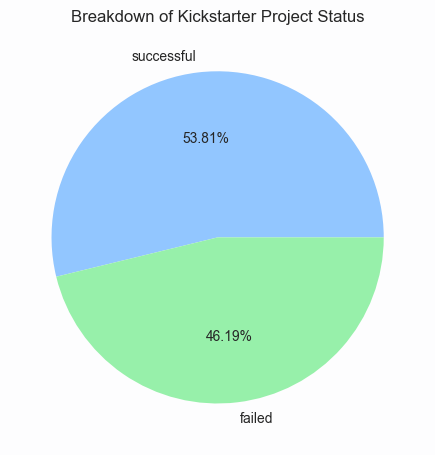

After processing there are 236791 records in train data


In [46]:
fe.fix_state(data) #deletes live projects and unites failed.
print(data.train_df["state"].value_counts())
visio.plot_distriubtion_by_state_slice(data.train_df)
num_recs = len(data.train_df)
print('After processing there are {} records in train data'.format(num_recs))

Cool! So up until now we used standard techniques. Now we will try and leverage the most interesting data we have in out set. The free text fields (which are the project's name, and 'blurb' which is a short discription of the project), and the projects pictures.

In [47]:
# import pickle
# with open("pickled_data/before_nima.pickle", "wb") as pickle_file:
#     pickle.dump(data, pickle_file)

# Phase 6: Project photos
The first thing we need to do to be able to gain some insights from the images is to be able to access them. We took a step in that direction, when parsing the urls for images in the dataset. Now the more chalenging part was to actualy obtain them. We chose to download them (as opposed to accessing them directly online or some other 'lazy' approach), as we predicted we would want to try a few different models on them and this would save us time on the long run. For this purpose (and to actualy run the models), we used a dedicated Azure cloud VM to download the 314K pictures weighing about 30GB. This enabled us to run uninterupted and with faster connection. The whole downloading process took about 2 days (with the very naive and un-paralelised code bellow).

In [48]:
from kickstarter import nima
import inspect
lines = inspect.getsource(nima.download_photos)
print(lines)

def download_photos(df, url_column='photo', name_column='id', folder='tmp'):
    folder = os.path.join(os.getcwd(), folder)
    if not os.path.exists(folder):
        os.makedirs(folder)
        logger.info('created folder')
    for i, (url, idnum) in enumerate(zip(df[url_column], df[name_column])):
        if (i % 10000 == 0):
            logger.info('downloaded {} images'.format(i))
        try:
            with urllib.request.urlopen(url) as response, open(os.path.join(folder, str(idnum)), 'wb+') as out_file:
                shutil.copyfileobj(response, out_file)
        except HTTPError as err:
            with open('bad_images.txt', 'a+') as f:
                f.write(str(idnum) + '\n')
                continue
    logger.info('Downloaded {} images'.format(str(len(df))))



Now that we had the photos we needed to find what we can do with them (actualy we did the reaserch before opening a dedicated VM and dowloading, but this narrates better). 

Doing some reaserch, we found NIMA, a paper by google's AI team, that suggest's leveraging convolutional neural networks to predict how aesthetically pleasing a photograph is.

https://arxiv.org/pdf/1709.05424.pdf

This seemed like a novel feature and we decided to find an implementation of the model on-line, as no model was actualy released by google. We tried a few private repos on git-hub, which did not seem promising (running them on a small sub-sample gave results that did not sit well with our judgment of the photos).

Finaly, we found a project by Idealo (a German e-commerce site, sort of like 'zap.co.il') which implements NIMA and was already succesfully used to rate hotels by on-line pictures.

Leveraging the model on our dataset required some tweeking and learning, especially in the data loading phase, where the original input for the model was different than ours and so where the pictures formats). This was also quite chalenging as running the model was only possible using a docker container we needed to learn how to handle.

Running the model on all 314K pictures with our GPU clad VM took several hours and yielded two jason arrays with the results. We can now add them into the dataset. As this is a lengthy process (due to the unfriendly output of the model) you can uncomment the cell bellow which will automatically download the clean dataset panda as a pickle and load it). 

In [49]:
from kickstarter import data_loader as dl
data = dl.get_pickles('with_NIMA.pickle')

In [50]:
#uncomment if you want to add nima manually
# from kickstarter.transformers import NimaTransformer
# with open("pickled_data/before_nima.pickle", "rb") as pickle_file:
#     data = pickle.load(pickle_file)

# data.apply_transformer(NimaTransformer())

# with open("pickled_data/with_NIMA.pickle", "wb") as pickle_file:
#     pickle.dump(data, pickle_file)

In [51]:
nes = data.df.isna().sum()
print(nes)

blurb                         4
category                      0
country                       0
created_at                    0
currency                      0
deadline                      0
goal                          0
id                            0
launched_at                   0
name                          3
photo                         0
pledged                       0
slug                          0
state                         0
state_changed_at              0
parent_category               0
category_name                 0
parent_category_name          0
creator_id                    0
creator_photo                 0
launched_at_month             0
launched_at_year              0
deadline_month                0
deadline_year                 0
destination_delta_in_days     0
creator_unsuccesses           0
creator_successes             0
creator_past_proj             0
nima_score                   11
nima_tech                    11
dtype: int64


In [52]:
data.train_df.dropna(subset=['nima_score','nima_tech'], inplace=True)
data.test_df.dropna(subset=['nima_score','nima_tech'], inplace=True)
len(data.df)

295944

Let's get a sense of what this model returned. We'll display bellow 9 random rhigh scoring images and 9 random low scoring ones. This function retreives these photos on-line, so it requires internet access.

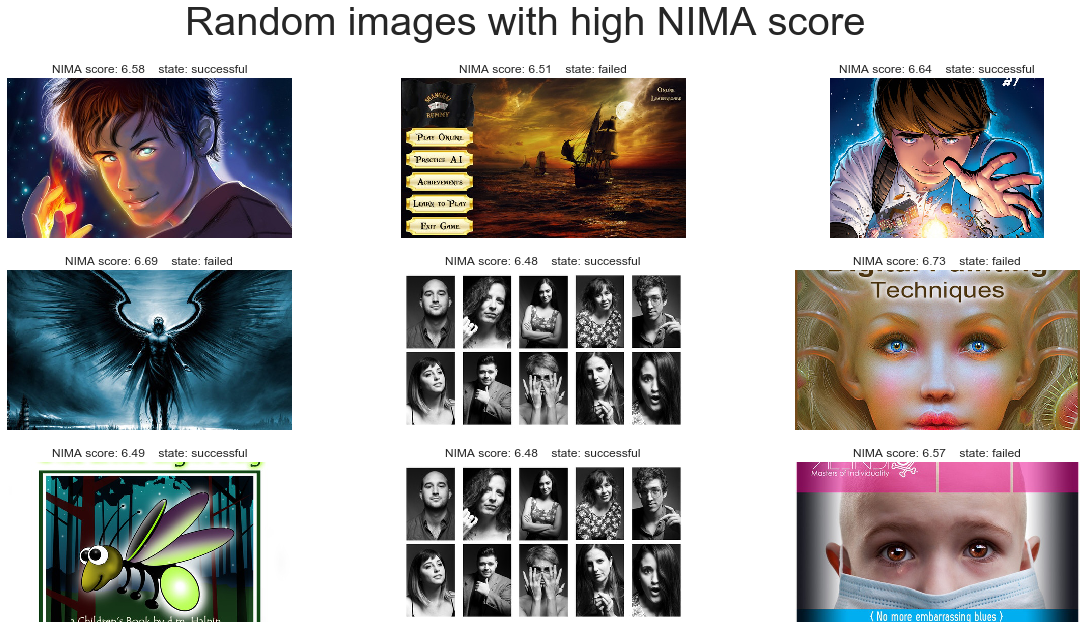

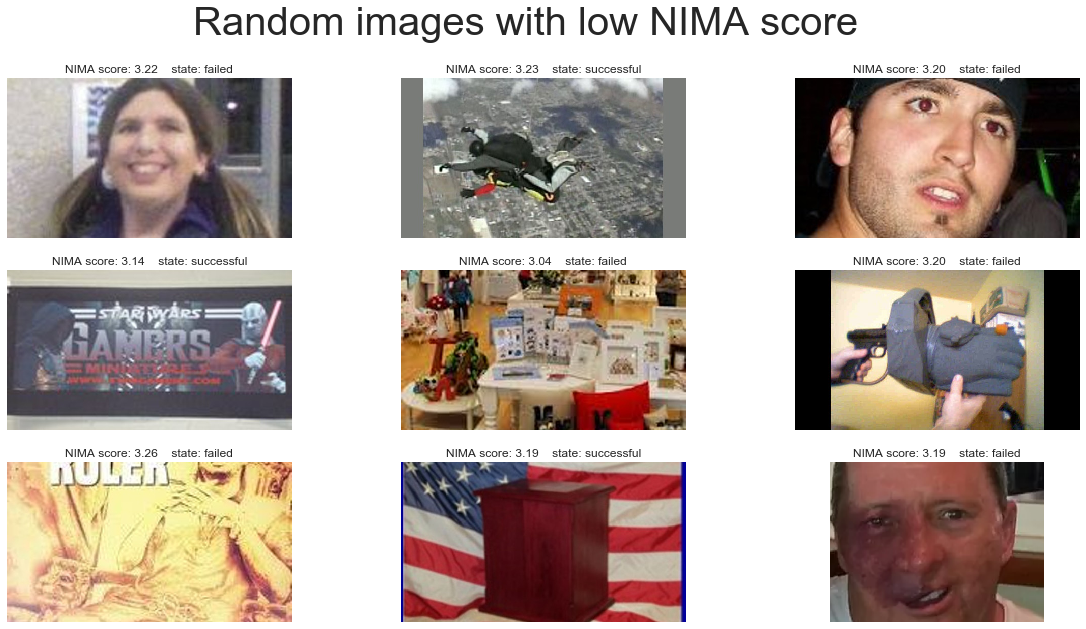

In [53]:
visio.display_imgs(data.df)

Let's compare the distribution of the technical ratings and the aesthetical ones.

Text(0.5, 1.0, 'Image score distribution')

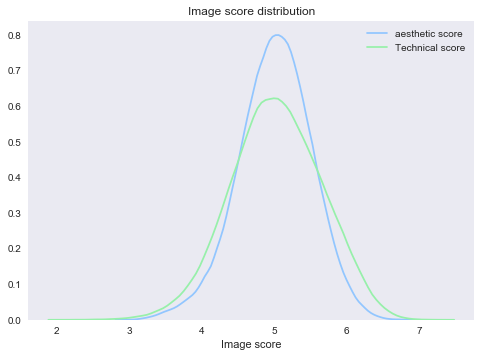

In [54]:
sns.distplot(data.df[['nima_score']], hist=False, rug=False, axlabel = 'Image score', label = 'aesthetic score')
sns.distplot(data.df[['nima_tech']], hist=False, rug=False, label = 'Technical score').set_title('Image score distribution')

Text(0.5, 1.0, 'Image score distribution')

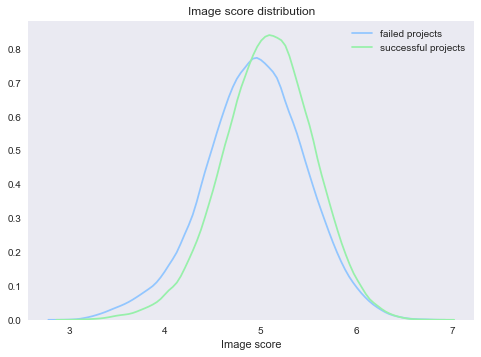

In [55]:
winners = data.df.loc[data.df['state'] == 'successful']
losers = data.df.loc[data.df['state'] == 'failed']
sns.distplot(losers[['nima_score']], hist=False, rug=False, axlabel = 'Image score', label = 'failed projects')
sns.distplot(winners[['nima_score']], hist=False, rug=False, label = 'successful projects').set_title('Image score distribution')

Text(0.5, 1.0, 'Image technical score distribution')

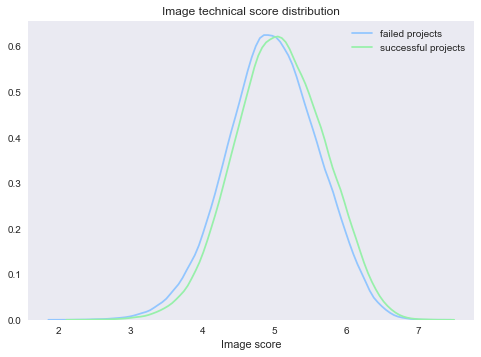

In [56]:
sns.distplot(losers[['nima_tech']], hist=False, rug=False, axlabel = 'Image score', label = 'failed projects')
sns.distplot(winners[['nima_tech']], hist=False, rug=False, label = 'successful projects').set_title('Image technical score distribution')

As the aesthetical model seems to be the one holding the most potential twards differentiating the distributions of the failed and successful projects, we will focus on it. Let's extract the distributions paramaters:

In [57]:
total_mean = data.df.nima_score.mean()
print('nima score total mean is {}'.format(total_mean))
total_std = data.df.nima_score.std()
print('nima score total std is {}'.format(total_std))
winner_mean = winners.nima_score.mean()
print('winners nima score mean is {}'.format(winner_mean))
winner_std = winners.nima_score.std()
print('winners nima score std is {}'.format(winner_std))
loser_mean = losers.nima_score.mean()
print('losers nime score mean is {}'.format(loser_mean))
loser_std = losers.nima_score.std()
print('losers nima score std is {}'.format(loser_std))

nima score total mean is 5.010026092259603
nima score total std is 0.5084147842100295
winners nima score mean is 5.072880605507883
winners nima score std is 0.4797784432188812
losers nime score mean is 4.936724198089032
losers nima score std is 0.5305739926284068


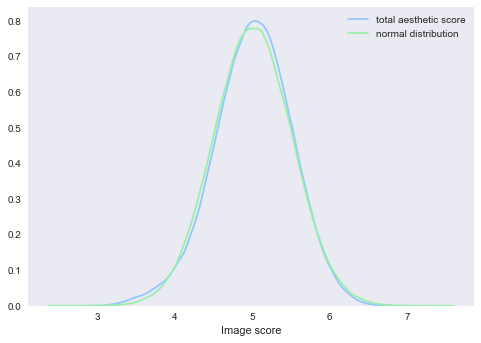

In [58]:
# compare general distribution to normal distribution with same mean and std
sns.distplot(data.df[['nima_score']], hist=False, rug=False, axlabel = 'Image score', label = 'total aesthetic score')
norm = np.random.normal(total_mean,total_std,300000)
sns.distplot(norm, hist=False, rug=False, axlabel = 'Image score', label = 'normal distribution')

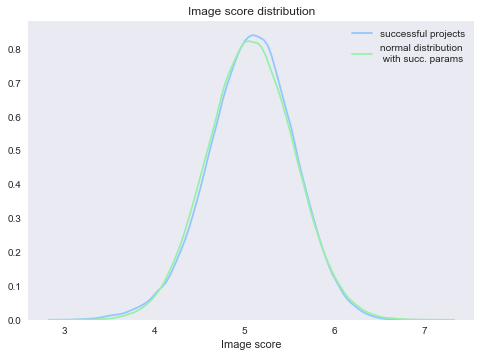

In [59]:
# compare successful distribution to normal distribution with same mean and std
sns.distplot(winners[['nima_score']], hist=False, rug=False, label = 'successful projects').set_title('Image score distribution')
norm = np.random.normal(winner_mean,winner_std,300000)
sns.distplot(norm, hist=False, rug=False, axlabel = 'Image score', label = 'normal distribution \n with succ. params')

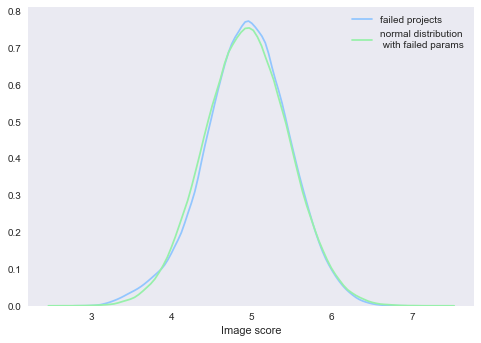

In [60]:
# compare failed distribution to normal distribution with same mean and std
sns.distplot(losers[['nima_score']], hist=False, rug=False, axlabel = 'Image score', label = 'failed projects')
norm = np.random.normal(loser_mean,loser_std,300000)
sns.distplot(norm, hist=False, rug=False, axlabel = 'Image score', label = 'normal distribution \n with failed params')

This is no ampirical normality test, but we can see that these distributions are practicaly normal, as is expected by the specification of the model.

# Phase 7: Project text attributes
Looking at NLP attributes of projects

In [61]:
from kickstarter import nlp

In [62]:
nes = data.df.isna().sum()
print(nes)

blurb                        4
category                     0
country                      0
created_at                   0
currency                     0
deadline                     0
goal                         0
id                           0
launched_at                  0
name                         3
photo                        0
pledged                      0
slug                         0
state                        0
state_changed_at             0
parent_category              0
category_name                0
parent_category_name         0
creator_id                   0
creator_photo                0
launched_at_month            0
launched_at_year             0
deadline_month               0
deadline_year                0
destination_delta_in_days    0
creator_unsuccesses          0
creator_successes            0
creator_past_proj            0
nima_score                   0
nima_tech                    0
dtype: int64


In [63]:
data.train_df.dropna(subset=['blurb','name'], inplace=True)
data.test_df.dropna(subset=['blurb','name'], inplace=True)
len(data.df)

295939

In [64]:
from kickstarter.transformers import SemanticTransformer
data.apply_transformer(SemanticTransformer())

In [65]:
data.df[["blurb", "blurb_pos", "blurb_neg", "blurb_compound"]].head()

,blurb,blurb_pos,blurb_neg,blurb_compound
273014,Exploring innovative ways of combining Korean ...,0.146,0.000,0.4404
371111,Holy Shiitake!!!! Vegetarian burgers and eats!...,0.199,0.000,0.6083
396792,You've been chosen to fight the Evil Necromanc...,0.114,0.222,-0.5267
417529,SOWFLO needs your help to release our first fu...,0.179,0.000,0.6124
154468,Llovo es un sistema que le permite consultar e...,0.000,0.000,0.0000


Text(0.5, 1.0, 'Image score distribution')

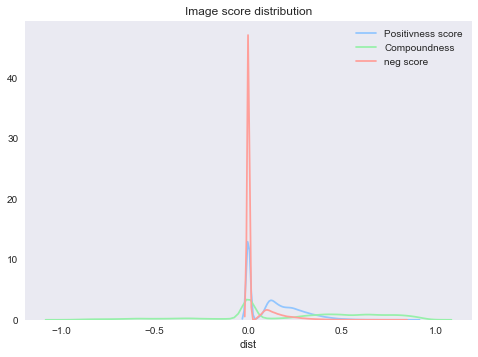

In [66]:
sns.distplot(data.df[['blurb_pos']], hist=False, rug=False, axlabel = 'dist', label = 'Positivness score')
sns.distplot(data.df[['blurb_compound']], hist=False, rug=False, axlabel = 'dist', label = 'Compoundness')
sns.distplot(data.df[['blurb_neg']], hist=False, rug=False, label = 'neg score').set_title('Image score distribution')

# Phase 8: Adding one hot encoding
So far, even though we have shown (by plots) the importance of "country", we haven't trained on this categorical data.
Moreover, we treated "category" and "parent_category" as ordinal data, instead of treating it as one hot encoding, and by doing so, we may have created unwanted proximity between values that are not necessarily similar.
Hence, we will try to train on those as one hot encodings.
#### Reminder: 
A transformer is a class which implements `fit` and `transform` and the `apply_transformer` function applies it over our data.  

In [67]:
from kickstarter.transformers import OneHotTransformer
data.apply_transformer(OneHotTransformer())

# Phase 9: Bag of words
We want to know which word is a "good" word to describe the project and which word is "bad". So in order to do that we used the "Bag of Words" theorem to calc the probability of a project to succeed according to the words used to describe it. 

In [68]:
from kickstarter.transformers import BagOfWords
data.apply_transformer(BagOfWords())

# Phase 10: TFIDF
Another method we used to analyze the words in the description of the project, was to calc the tdidf for the most frequent words. And to add the result features vector to the dataset.

In [69]:
from kickstarter.transformers import TfidfTransformer
data.apply_transformer(TfidfTransformer())

# Phase 11: Train the model
First, lets take a peek at the data

In [70]:
data.df.head()

,blurb,category,country,created_at,currency,deadline,goal,id,launched_at,name,photo,pledged,slug,state,state_changed_at,parent_category,category_name,parent_category_name,creator_id,creator_photo,launched_at_month,launched_at_year,deadline_month,deadline_year,destination_delta_in_days,creator_unsuccesses,creator_successes,creator_past_proj,nima_score,nima_tech,blurb_pos,blurb_neg,blurb_compound,country_AT,country_AU,country_BE,country_CA,country_CH,country_CN,country_DE,country_DK,country_ES,country_FR,country_GB,country_Global,country_HK,country_IE,country_IT,country_JP,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US AK,country_US AL,country_US AR,country_US AZ,country_US CA,country_US CO,country_US CT,country_US DC,country_US DE,country_US FL,country_US GA,country_US HI,country_US IA,country_US ID,country_US IL,country_US IN,country_US KS,country_US KY,country_US LA,country_US MA,country_US MD,country_US ME,country_US MI,country_US MN,country_US MO,country_US MS,country_US MT,country_US NC,country_US ND,country_US NE,country_US NH,country_US NJ,country_US NM,country_US NV,country_US NY,country_US OH,country_US OK,country_US OR,country_US PA,country_US RI,country_US SC,country_US SD,country_US TN,country_US TX,country_US UT,country_US VA,country_US VT,country_US WA,country_US WI,country_US WV,country_US WY,country_US unknown,country_nan,category_name_3d printing,category_name_academic,category_name_accessories,category_name_action,category_name_animals,category_name_animation,category_name_anthologies,category_name_apparel,category_name_apps,category_name_architecture,category_name_art,category_name_art books,category_name_audio,category_name_bacon,category_name_blues,category_name_calendars,category_name_camera equipment,category_name_candles,category_name_ceramics,category_name_children's books,category_name_childrenswear,category_name_chiptune,category_name_civic design,category_name_classical music,category_name_comedy,category_name_comic books,category_name_comics,category_name_community gardens,category_name_conceptual art,category_name_cookbooks,category_name_country & folk,category_name_couture,category_name_crafts,category_name_crochet,category_name_dance,category_name_design,category_name_digital art,category_name_diy,category_name_diy electronics,category_name_documentary,category_name_drama,category_name_drinks,category_name_electronic music,category_name_embroidery,category_name_events,category_name_experimental,category_name_fabrication tools,category_name_faith,category_name_family,category_name_fantasy,category_name_farmer's markets,category_name_farms,category_name_fashion,category_name_festivals,category_name_fiction,category_name_film & video,category_name_fine art,category_name_flight,category_name_food,category_name_food trucks,category_name_footwear,category_name_gadgets,category_name_games,category_name_gaming hardware,category_name_glass,category_name_graphic design,category_name_graphic novels,category_name_hardware,category_name_hip-hop,category_name_horror,category_name_illustration,category_name_immersive,category_name_indie rock,category_name_installations,category_name_interactive design,category_name_jazz,category_name_jewelry,category_name_journalism,category_name_kids,category_name_knitting,category_name_latin,category_name_letterpress,category_name_literary journals,category_name_literary spaces,category_name_live games,category_name_makerspaces,category_name_metal,category_name_mixed media,category_name_mobile games,category_name_movie theaters,category_name_music,category_name_music videos,category_name_musical,category_name_narrative film,category_name_nature,category_name_nonfiction,category_name_painting,category_name_people,category_name_performance art,category_name_performances,category_name_periodicals,category_name_pet fashion,category_name_photo,category_name_photobooks,category_name_photography,category_name_places,category_name_playing cards,category_

Now, given our final representation for our data    
Let's set the input fields we want to use for the data:

In [71]:
input_fields = ['launched_at_month', 'launched_at_year', 'destination_delta_in_days', 'goal', 'nima_score',
                'blurb_pos','blurb_neg', 'blurb_compound',"bag_of_words", 
                "creator_unsuccesses", "creator_successes", "creator_past_proj"]
input_fields.extend([col for col in data.df.columns if str.startswith(col, 'category_name_')])
input_fields.extend([col for col in data.df.columns if str.startswith(col, 'parent_category_name_')])
input_fields.extend([col for col in data.df.columns if str.startswith(col, 'country_')])
input_fields.extend([col for col in data.df.columns if str.startswith(col, 'tfidf_')])
input_fields.append("nima_tech")
data.input_fields = input_fields

The only thing left to do is to train the final model!

In [72]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.train_x)

X_train = scaler.transform(data.train_x)
X_test = scaler.transform(data.test_x)
y_train = data.train_y
y_test = data.test_y

model = LGBMClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('precision is: ' + str(1 - np.mean(pred != y_test)))

precision is: 0.7910581473968898


Let's play a bit with the recall to find to wanted threshold

In [73]:
from sklearn.metrics import accuracy_score
pred_proba = model.predict_proba(X_test)
result = []
ys = list(y_test)
for thres in np.arange(0.5,1, 0.025):
    actual_y = []
    predict_y = []
    for i in range(len(ys)):
        if np.max(pred_proba[i]) < thres:
            continue
        actual_y.append(ys[i])
        predict_y.append(np.argmax(pred_proba[i]))
    acc = accuracy_score(actual_y, predict_y)
    result.append({"threshold":thres,"accuracy":acc,"recall":len(actual_y)/len(ys)})
pd.DataFrame(result)

,threshold,accuracy,recall
0,0.500,0.791058,1.000000
1,0.525,0.804682,0.953871
2,0.550,0.818766,0.907590
3,0.575,0.832539,0.862018
4,0.600,0.845307,0.816684
5,0.625,0.858154,0.773394
6,0.650,0.870756,0.728871
7,0.675,0.883588,0.684922
8,0.700,0.896501,0.641515
9,0.725,0.909178,0.600406


Awesome! We got that the threshold `0.6` gives us `~84%` acc with `~81%` recall

# Phase 12: Fun With Friends!
After we finished building our model lets try to add the other kickstarter team's data and see what we get!  
First lets take a peek at their dataset

In [74]:
df2 = pd.read_csv("new_features.csv")

In [75]:
df2.head()

,id,count_7_days,category_count_7_days,min_reward_price,max_reward_price,avg_reward_price,num_of_reward_options,photo_score
0,1.526137e+08,481,7,1.526718,41.221374,17.938931,4,49.608682
1,1.058755e+09,510,72,0.004167,0.008333,0.006250,2,100.000000
2,1.464229e+09,390,74,0.003333,6.666667,1.028095,7,17.386692
3,1.989775e+09,931,102,0.001667,3.333333,0.756389,6,49.809417
4,1.907223e+09,444,29,0.028571,4.285714,7.250893,32,53.776625


In order to append their features to our we first create a mapping from a project id to its new columns

In [76]:
df2.set_index("id", inplace=True)

In [77]:
df2.head()

,count_7_days,category_count_7_days,min_reward_price,max_reward_price,avg_reward_price,num_of_reward_options,photo_score
id,,,,,,,
1.526137e+08,481,7,1.526718,41.221374,17.938931,4,49.608682
1.058755e+09,510,72,0.004167,0.008333,0.006250,2,100.000000
1.464229e+09,390,74,0.003333,6.666667,1.028095,7,17.386692
1.989775e+09,931,102,0.001667,3.333333,0.756389,6,49.809417
1.907223e+09,444,29,0.028571,4.285714,7.250893,32,53.776625


In [78]:
id_to_row = {}
for iid,row in df2.iterrows():
     id_to_row[int(iid)] = row

In [79]:
train_rows = []
test_rows = []
for index in data.train_df["id"]:
    if index in id_to_row:
        train_rows.append(id_to_row[index])
    else:
        train_rows.append(None)

for index in data.test_df["id"]:
    if index in id_to_row:
        test_rows.append(id_to_row[index])
    else:
        test_rows.append(None)

In [80]:
id_to_row.clear() # clearing ram

Checking how many id's mismatch occured

In [81]:
len([i for i in train_rows if i is None])

42354

Filling the n/a values with the mean

In [82]:
train_mean = pd.DataFrame([i for i in train_rows if i is not None]).mean()
test_mean = pd.DataFrame([i for i in test_rows if i is not None]).mean()

In [83]:
train_rows = [row if row is not None else train_mean for row in train_rows]
test_rows = [row if row is not None else test_mean for row in test_rows]

In [84]:
train_added_df = pd.DataFrame(train_rows, index=data.train_df.index)
test_added_df = pd.DataFrame(test_rows, index=data.test_df.index)

In [85]:
train_rows.clear() # clearing ram
test_rows.clear()

Now to concat the new columns

In [86]:
data.train_df = pd.concat([data.train_df, train_added_df], axis=1)
data.test_df = pd.concat([data.test_df, test_added_df], axis=1)

In [87]:
data.input_fields += list(df2.columns)

And finally to train the model

In [88]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.train_x)

X_train = scaler.transform(data.train_x)
X_test = scaler.transform(data.test_x)
y_train = data.train_y
y_test = data.test_y

model = LGBMClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('precision is: ' + str(1 - np.mean(pred != y_test)))

precision is: 0.8437119675456389


And now lets reduce the recall a bit

In [89]:
from sklearn.metrics import accuracy_score
pred_proba = model.predict_proba(X_test)
result = []
ys = list(y_test)
for thres in np.arange(0.5,1, 0.025):
    actual_y = []
    predict_y = []
    for i in range(len(ys)):
        if np.max(pred_proba[i]) < thres:
            continue
        actual_y.append(ys[i])
        predict_y.append(np.argmax(pred_proba[i]))
    acc = accuracy_score(actual_y, predict_y)
    result.append({"threshold":thres,"accuracy":acc,"recall":len(actual_y)/len(ys)})
pd.DataFrame(result)

,threshold,accuracy,recall
0,0.500,0.843712,1.000000
1,0.525,0.852926,0.971281
2,0.550,0.862803,0.942394
3,0.575,0.873735,0.911663
4,0.600,0.883475,0.881542
5,0.625,0.893630,0.849375
6,0.650,0.903929,0.817799
7,0.675,0.913812,0.785666
8,0.700,0.922774,0.751640
9,0.725,0.932838,0.717039


Amazing! We got that the threshold `0.650` is good and gives us `~90%` acc with `~81%` recall